In [ ]:
import zipfile
import pandas as pd
import numpy as np
import os

In [ ]:
# Membaca file zip
zip_file_path = "imageset.zip"
folder_path = "imageset"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
folder_path = "imageset"
# Menginisialisasi list kosong untuk menyimpan data gambar dan label
image_data = []
label_data = []


# Melakukan iterasi pada setiap folder di dalam folder_path
for folder_name in ['a', 'ae', 'ba', 'ca', 'da', 'e', 'eu', 'fa', 'ga',
                     'ha', 'i', 'ja', 'ka', 'ma', 'na', 'nga', 'nya', 'o',
                     'pa', 'qa', 'ra', 'sa', 'ta', 'u', 'va', 'wa', 'xa', 'ya', 'za']:
    folder_dir = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder_dir):
        # Melakukan iterasi pada setiap file di dalam folder
        for filename in os.listdir(folder_dir):
            file_path = os.path.join(folder_dir, filename)
            if os.path.isfile(file_path):
                # Menambahkan path file (gambar) ke dalam list image_data
                image_data.append(file_path)
                # Menambahkan label folder ke dalam list label_data
                label_data.append(folder_name)

In [ ]:
# Membuat DataFrame dari list image_data dan label_data
df = pd.DataFrame({'images': image_data, 'label': label_data})

# Menampilkan DataFrame
df

,images,label
0,imageset\a\a_1.jpg,a
1,imageset\a\a_10.jpg,a
2,imageset\a\a_100.jpg,a
3,imageset\a\a_101.jpg,a
4,imageset\a\a_102.jpg,a
...,...,...
3673,imageset\za\za_95.jpg,za
3674,imageset\za\za_96.jpg,za
3675,imageset\za\za_97.jpg,za
3676,imageset\za\za_98.jpg,za


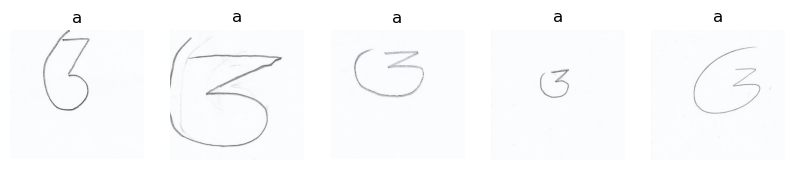

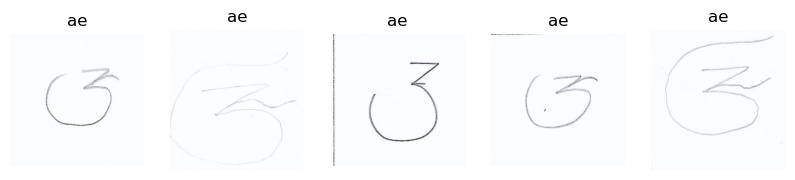

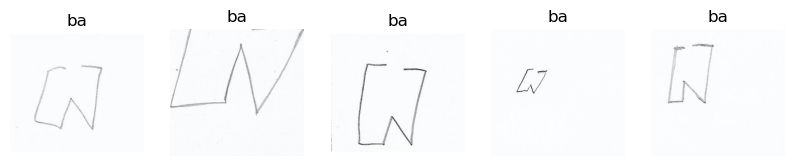

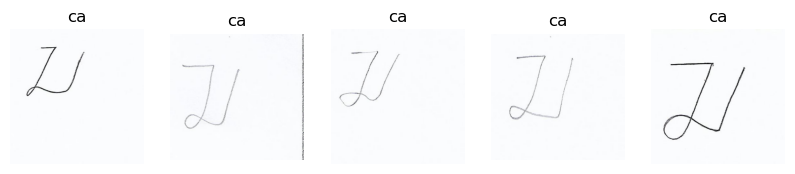

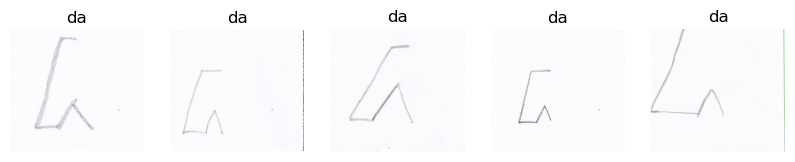

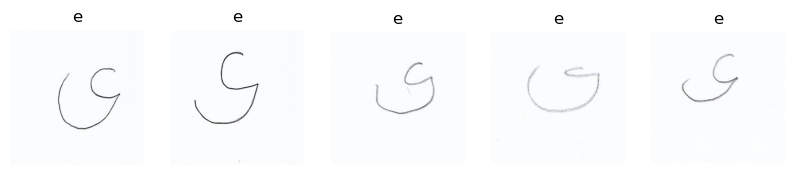

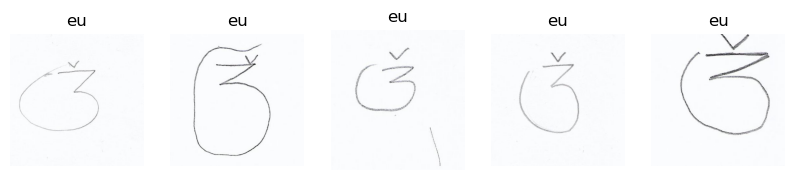

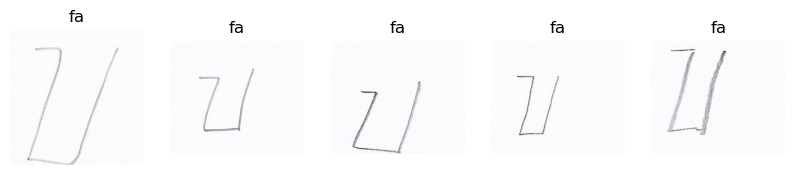

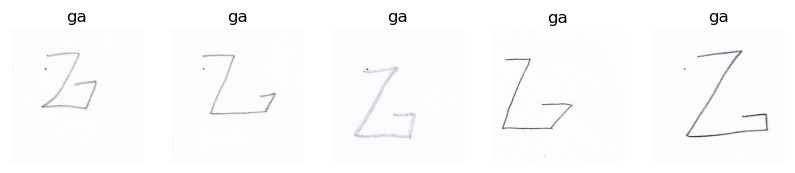

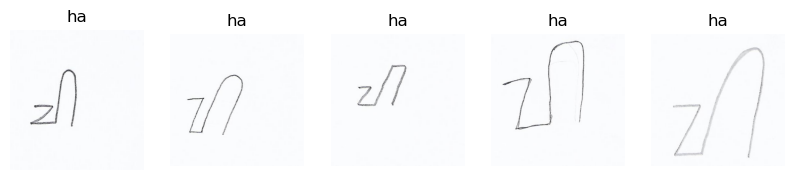

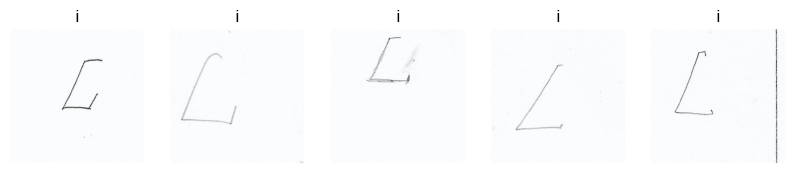

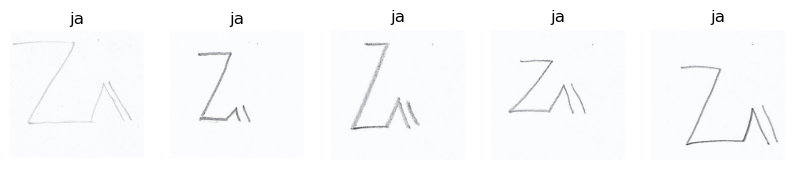

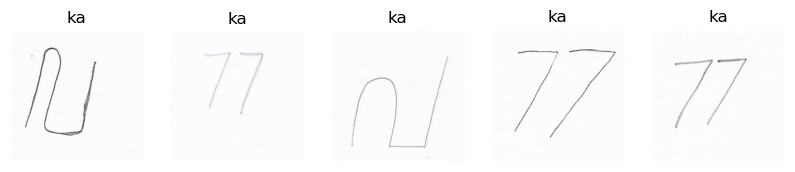

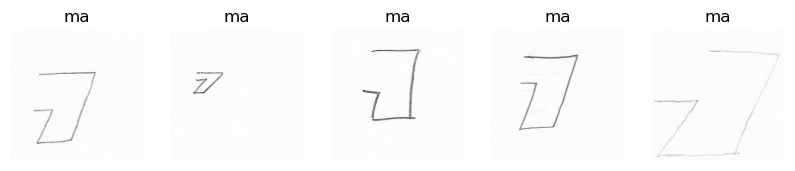

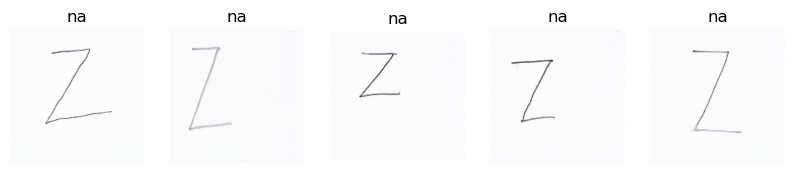

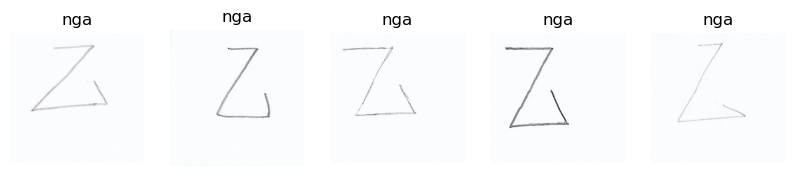

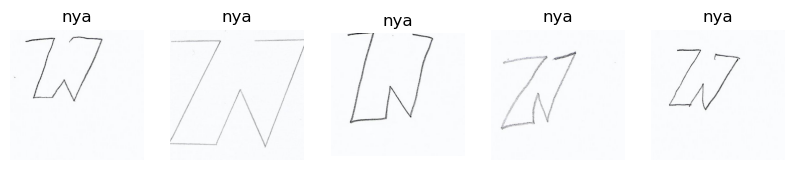

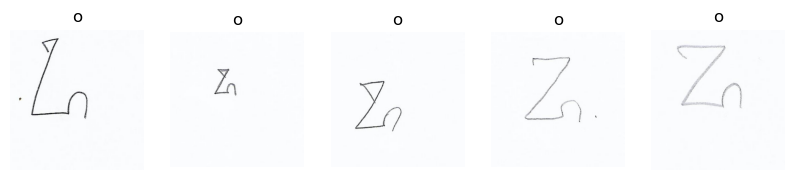

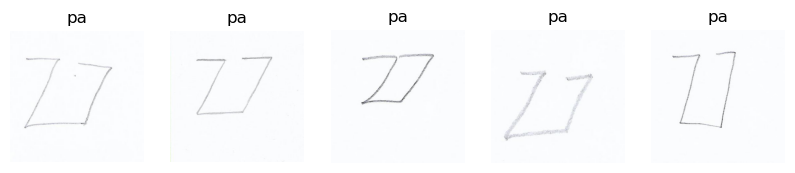

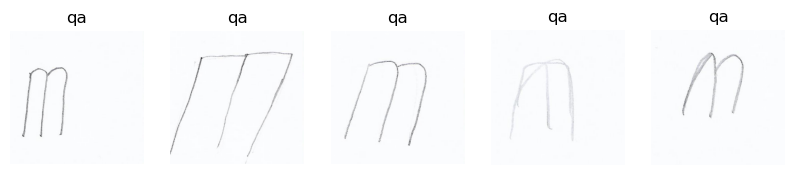

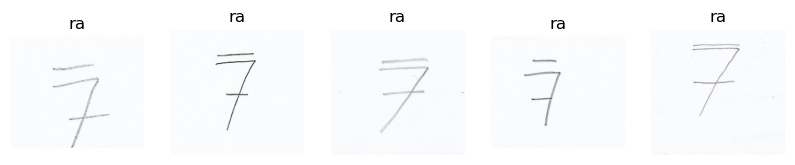

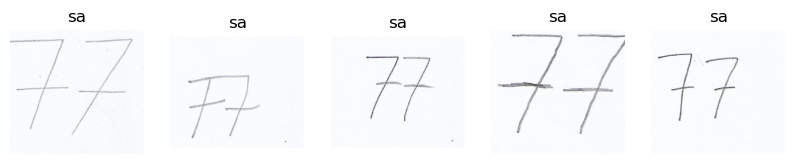

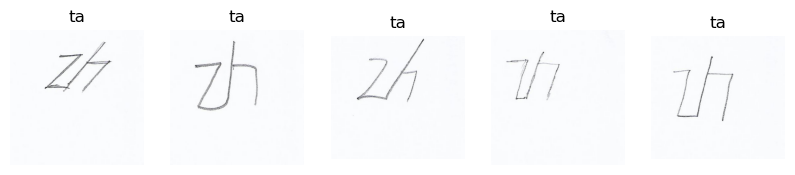

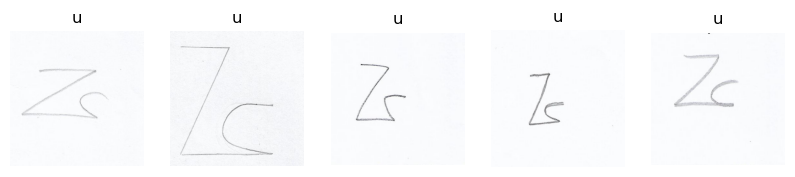

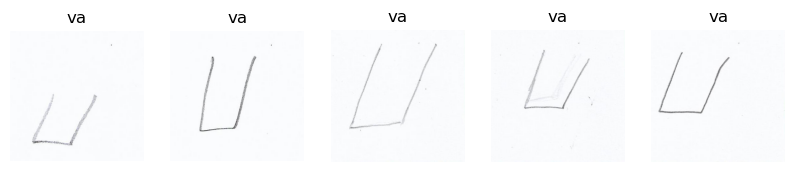

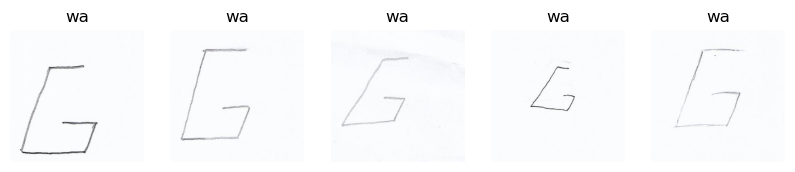

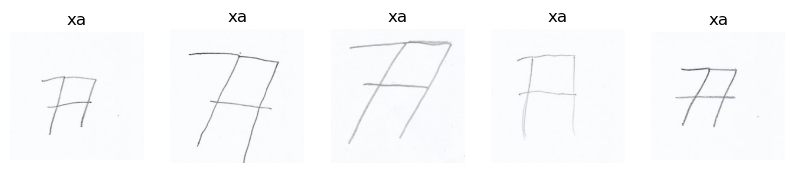

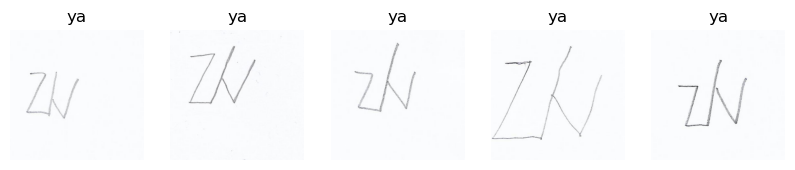

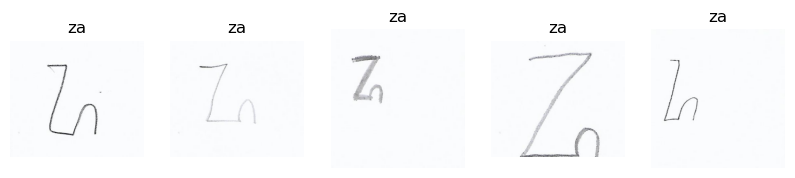

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Menampilkan 5 contoh gambar dari setiap label
for label in df['label'].unique():
    label_images = df[df['label'] == label]['images'].sample(5)  # Mengambil 5 gambar acak dari setiap label
    plt.figure(figsize=(10, 4))
    for i, img_path in enumerate(label_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label)
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder

# Inisialisasi array untuk menyimpan gambar dan label
images = []
labels = []

# Mengubah gambar menjadi format yang sesuai

for index, row in df.iterrows():
    img_path = row['images']
    label = row['label']
    img = load_img(img_path, target_size=(224, 224))  # Mengubah ukuran gambar menjadi 224x224 pixels
    img = img_to_array(img) / 255.0  # Normalisasi piksel menjadi nilai antara 0 dan 1
    images.append(img)
    labels.append(label)



In [ ]:
images = np.array(images)

In [ ]:
# Mengubah label menjadi nilai numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

In [ ]:
print("Jumlah data pada set pelatihan:")
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("\nJumlah data pada set pengujian:")
print("X_test:", len(X_test))
print("y_test:", len(y_test))

Jumlah data pada set pelatihan:
X_train: 2942
y_train: 2942

Jumlah data pada set pengujian:
X_test: 736
y_test: 736


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
'''
# Membangun model CNN
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()
'''


"\n# Membangun model CNN\nmodel = Sequential()\nmodel.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(10, activation='relu'))\nmodel.add(Dense(len(label_encoder.classes_), activation='softmax'))\nmodel.summary()\n"

In [ ]:
# Model Development
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, LeakyReLU, GlobalMaxPooling2D, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

model=Sequential()

model.add(Conv2D(32,(5,5),padding='same',input_shape=(224,224, 3)))
model.add(LeakyReLU(alpha=.02))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(.2))

model.add(Conv2D(196,(5,5)))
model.add(LeakyReLU(alpha=.02))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.3))

model.add(GlobalMaxPooling2D())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=.02))
model.add(Dropout(.3))   #asalnya 2

model.add(Dense(29))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 196)     156996    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 108, 108, 196)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 196)      0         
 2D)                                                    

In [ ]:
import datetime

# Mulai menghitung waktu eksekusi
start_time = datetime.datetime.now()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#check point
#checkpoint = ModelCheckpoint("my_model.h5", monitor='val_accuracy', verbose=1, save_weights_only=False, mode='auto', period=1)
# Old code with 'period' argument
checkpoint_callback = ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_weights_only=True, period=5)

# Updated code with 'save_freq' argument
checkpoint_callback = ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_weights_only=True, save_freq='epoch')


# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')#restore_best_weights=True


# Melatih model dengan seluruh data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Selesai eksekusi, hitung waktu total
end_time = datetime.datetime.now()

# Hitung selisih waktu
execution_time = end_time - start_time
print("Waktu eksekusi: ", execution_time)
hours, remainder = divmod(execution_time.seconds, 3600)
minutes, seconds = divmod(remainder, 60)
print("Waktu eksekusi: {} jam, {} menit, {} detik".format(hours, minutes, seconds))

Epoch 1/100
92/92 [==============================] - 460s 5s/step - loss: 3.3661 - accuracy: 0.0683 - val_loss: 3.3624 - val_accuracy: 0.0584
Epoch 2/100
92/92 [==============================] - 484s 5s/step - loss: 3.2901 - accuracy: 0.0768 - val_loss: 3.2675 - val_accuracy: 0.0761
Epoch 3/100
92/92 [==============================] - 440s 5s/step - loss: 3.1286 - accuracy: 0.0918 - val_loss: 3.0677 - val_accuracy: 0.0897
Epoch 4/100
92/92 [==============================] - 464s 5s/step - loss: 2.8972 - accuracy: 0.1108 - val_loss: 2.7538 - val_accuracy: 0.1141
Epoch 5/100
92/92 [==============================] - 505s 5s/step - loss: 2.6189 - accuracy: 0.1451 - val_loss: 2.6001 - val_accuracy: 0.1508
Epoch 6/100
92/92 [==============================] - 660s 7s/step - loss: 2.4841 - accuracy: 0.1866 - val_loss: 2.5036 - val_accuracy: 0.1929
Epoch 7/100
92/92 [==============================] - 1114s 12s/step - loss: 2.3602 - accuracy: 0.2169 - val_loss: 2.4489 - val_accuracy: 0.2201
Epoc

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Prediksi menggunakan model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
target_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

23/23 [==============================] - 40s 1s/step
Confusion Matrix:
[[20  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 6 20  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0 23  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  1  0  0  1]
 [ 0  0  0 27  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0]
 [ 0  0  3  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1]
 [ 1  1  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 1  2  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 14  0  0  0  0 13  1  0  0  0  3  0  0  1  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 18  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  1  0  0  0]
 [ 0  0  

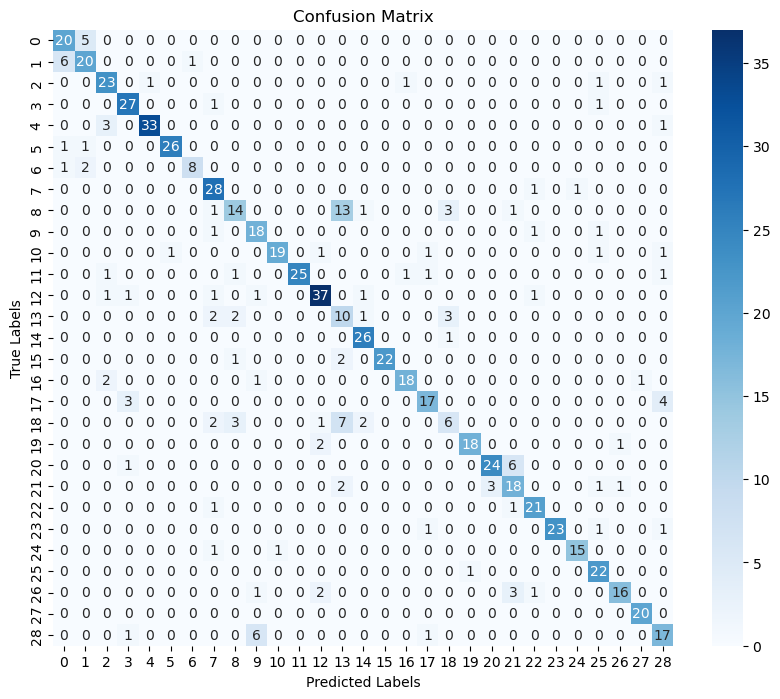

In [ ]:
import seaborn as sns
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

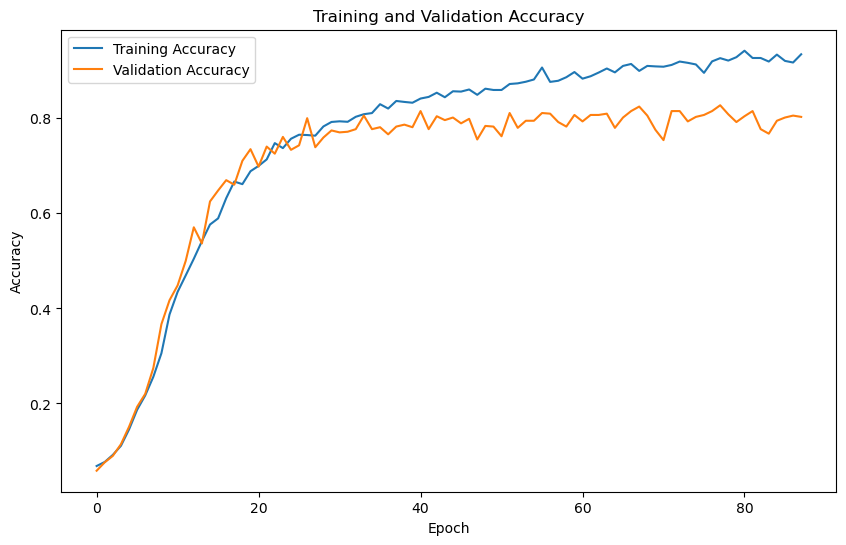

In [ ]:
# Training dan Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

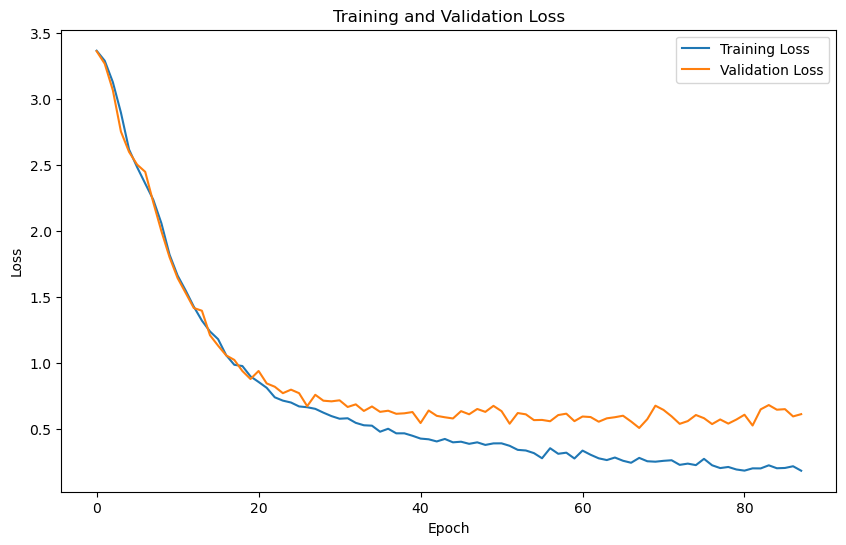

In [ ]:
# Training dan Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
saved_model_path = "mymodel.h5"

# YOUR CODE HERE
model.save(saved_model_path)

In [ ]:
#!pip install tensorflowjs

import tensorflow as tf
#import tensorflowjs as tfjs

# Specify the path to your saved Keras model
saved_model_path = "mymodel.h5"

# Load the saved Keras model
model = tf.keras.models.load_model(saved_model_path)

# Specify the output directory where the converted files will be saved
output_dir = "output_directory"

# Convert the Keras model to TensorFlow.js format
#tfjs.converters.save_keras_model(model, output_dir)

1/1 [==============================] - 9s 9s/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
1.0
da


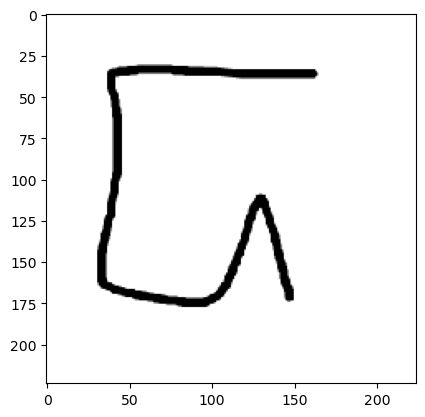

In [ ]:
import keras.utils as image

img = image.load_img("testing.png", target_size=(224, 224), color_mode='grayscale')
img = np.asarray(img)
img_rgb = np.repeat(img[..., np.newaxis], 3, axis=-1)  # Mengulang saluran warna
plt.imshow(img_rgb)
img_rgb = np.expand_dims(img_rgb, axis=0)

from keras.models import load_model
saved_model = load_model("mymodel.h5")
output = saved_model.predict(img_rgb)

max = output[0][0]
pos = 0
for i in range(1, 29):
    if output[0][i] > max:
        max = output[0][i]
        pos = i

print(output)
print(max)

if (pos == 0) :
    print('a')
elif (pos == 1) :
    print('ae')
elif (pos == 2) :
    print('ba')
elif (pos == 3) :
    print('ca')
elif (pos == 4) :
    print('da')
elif (pos == 5) :
    print('e')
elif (pos == 6) :
    print('eu')
elif (pos == 7) :
    print('fa')
elif (pos == 8) :
    print('ga')
elif (pos == 9) :
    print('ha')
elif (pos == 10) :
    print('i')
elif (pos == 11) :
    print('ja')
elif (pos == 12) :
    print('ka')
elif (pos == 13) :
    print('ma')
elif (pos == 14) :
    print('na')
elif (pos == 15) :
    print('nga')
elif (pos == 16) :
    print('nya')
elif (pos == 17) :
    print('o')
elif (pos == 18) :
    print('pa')
elif (pos == 19) :
    print('qa')
elif (pos == 20) :
    print('ra')
elif (pos == 21) :
    print('sa')
elif (pos == 22) :
    print('ta')
elif (pos == 23) :
    print('u')
elif (pos == 24) :
    print('va')
elif (pos == 25) :
    print('wa')
elif (pos == 26) :
    print('xa')
elif (pos == 27) :
    print('ya')
elif (pos == 28) :
    print('za')